In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup
import folium
from sklearn import preprocessing
import geopandas as gpd
import matplotlib.colors as colors
import matplotlib.colors as colors
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from helpers import *
from ipywidgets import SelectMultiple, RadioButtons, interact, Layout
from statsmodels.tsa.stattools  import   grangercausalitytests
%load_ext autoreload
%autoreload 2

## How are $CO_{2}$ EMISSONS and CLIMATE CHANGE CORRELATED?

We always hear about people talking about **Climate Change** and **$CO_2$ emission**, several times politicians dont' talk about the topic in order to not loose vote and citizens strike for that. 
<br>
<br>
Since we are Data Scientist we don't trust about both and we would like to check the causality between this two phenomenon by how our hands (and our computers, of course).
<br>
<br>
From the FAO dataset we took all the data about Climate Change. In that web site there were no data about the $CO_2$ emissions in total, but only related to to crops and live stocks enviroment. In order to get the complete data we use *The World Bank* ([here](https://data.worldbank.org/indicator/EN.ATM.CO2E.PC))

This Data Frame, called *emission_per_capita* , contains information about the total amount of $CO_2$ during all year per capita.

In [7]:
emissions_per_capita = pd.read_excel('CO2/API_EN.ATM.CO2E.PC_DS2_en_excel_v2_566370.xls')
emissions_per_capita = emissions_per_capita.drop(['Country Code','Indicator Name','Indicator Code'], axis=1)
emissions_per_capita = emissions_per_capita.rename(columns={'Country Name':'Area'})
emissions_per_capita = emissions_per_capita.set_index('Area')
emissions_per_capita.columns = emissions_per_capita.columns.str.replace('Y', '')
emissions_per_capita = pd.DataFrame(emissions_per_capita.stack())
emissions_per_capita = emissions_per_capita.reset_index()
emissions_per_capita = emissions_per_capita.rename(columns={'level_1': 'YEAR',0: 'emissions_per_capita'})
emissions_per_capita.YEAR = emissions_per_capita.YEAR.astype('int')
emissions_per_capita = emissions_per_capita.set_index('YEAR')
emissions_per_capita = emissions_per_capita[emissions_per_capita.Area=='World']
emissions_per_capita = emissions_per_capita.loc[1961:2014]

As mentioned before, from FAO dataset we managed to get all the data related to Climate Change. As this phenomenon is not striclty related to each country but influences the entire world community, we decided to use data related to the all planet.

In [8]:
World_climate = pd.read_csv('CO2/FAOSTAT_data_12-16-2019.csv')
World_climate = World_climate[['Year Code','Value']]
World_climate = World_climate.rename(columns={'Year Code':'YEAR'})
World_climate = World_climate.set_index('YEAR')
World_climate = World_climate.loc[1961:2014]

In [9]:
df = pd.DataFrame()
df[['climate_change']] = World_climate[['Value']]#.set_index('YEAR')
df = pd.DataFrame(df)
df['CO2_emission_per_capita'] = emissions_per_capita.emissions_per_capita

From the plots below we can easily notice how both lines grew in the last 50 years. But this is not enough to prove that emissions cause climate Change.

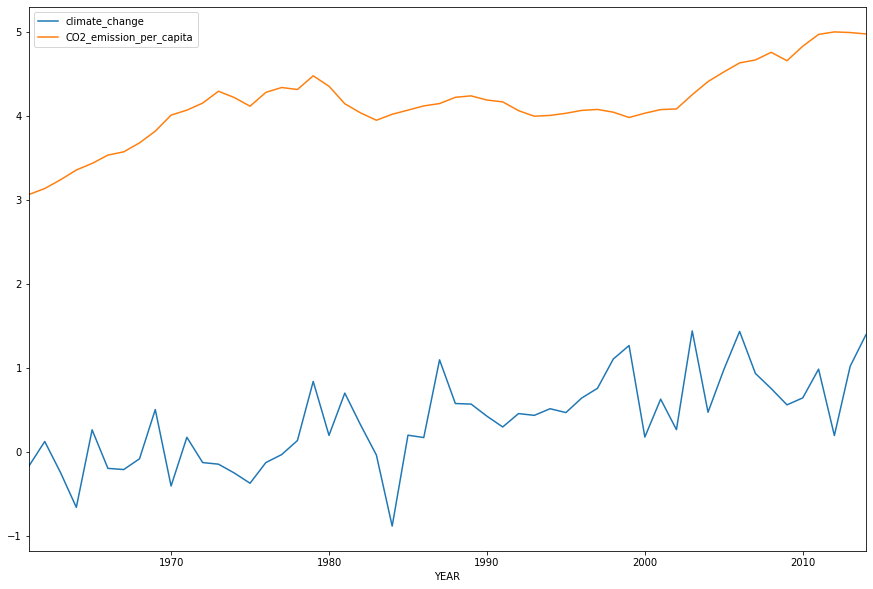

In [11]:
df.plot(figsize=(15,10))

In order to prove **Causuality** we are going to use **Granger Casuality test**.
<br>
<br>
Granger causality is a way to investigate causality between two variables in a time series. It's a hypotesis test where the
null hypothesis is that $TimeSeries_{1}$ do not explain the variation in $TimeSeries_{2}$.
<br>
<br>
In our cause $TimeSeries_{1}$ is the times serie about *CO2 emission* and  $TimeSeries_{2}$ is the one about *Climate Change*.
<br>
<br>
We used the library *statsmodels* to perform the test, the outputs are the p-values of four differet test: *ssr based F test, ssr based $chi^{2}$, likelihood ration test, paramete F test* . The functions also repeats the test for several lags, so we are able to know if there is casuality or not from time series in different range of year. 
<br>
For example Climate Change related to this year could be connected by the emission of the last year but not from the ones of three years ago.
<br>
<br>
Fro this test we deciced to reject the null hypotesis if all the p-values form the different test are less or equal than $\alpha$, with $\alpha$ = 0.05.

In [12]:
grangercausalitytests(df.values,maxlag=9).keys


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.1021  , p=0.0103  , df_denom=50, df_num=1
ssr based chi2 test:   chi2=7.5283  , p=0.0061  , df=1
likelihood ratio test: chi2=7.0394  , p=0.0080  , df=1
parameter F test:         F=7.1021  , p=0.0103  , df_denom=50, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4012  , p=0.1016  , df_denom=47, df_num=2
ssr based chi2 test:   chi2=5.3132  , p=0.0702  , df=2
likelihood ratio test: chi2=5.0589  , p=0.0797  , df=2
parameter F test:         F=2.4012  , p=0.1016  , df_denom=47, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3453  , p=0.2720  , df_denom=44, df_num=3
ssr based chi2 test:   chi2=4.6779  , p=0.1970  , df=3
likelihood ratio test: chi2=4.4756  , p=0.2145  , df=3
parameter F test:         F=1.3453  , p=0.2720  , df_denom=44, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4729  , p=0.2280  , df_d

<function dict.keys>

## COMMENTS

From the test above we can see how the **$CO_2$ emissions** have a relation of causuality with **Climate Change** but only after some years, so the emission of this year are important for five years later's *Climate Change*. In particular the output of the tests tell us that the **causuality appears after 5 years**.